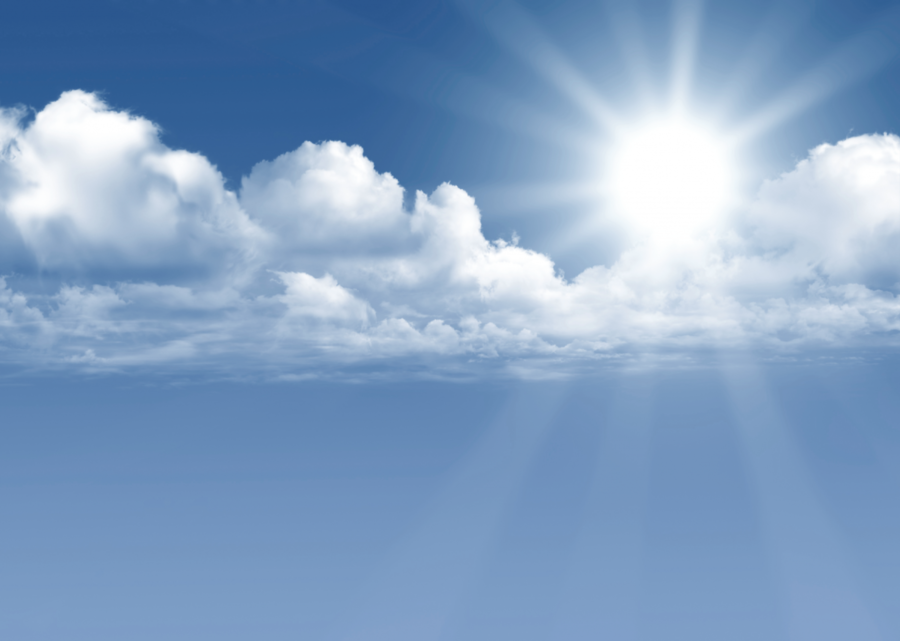

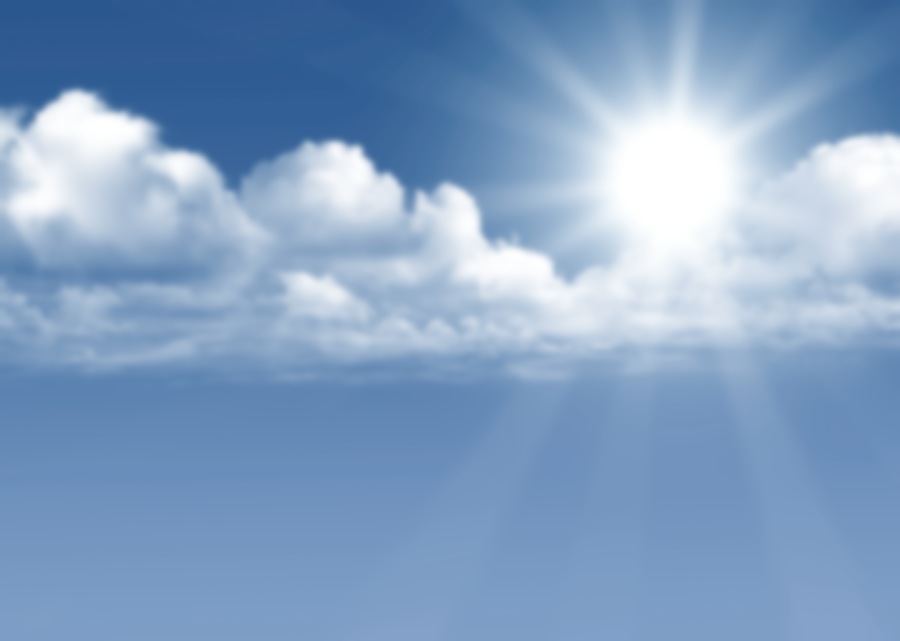

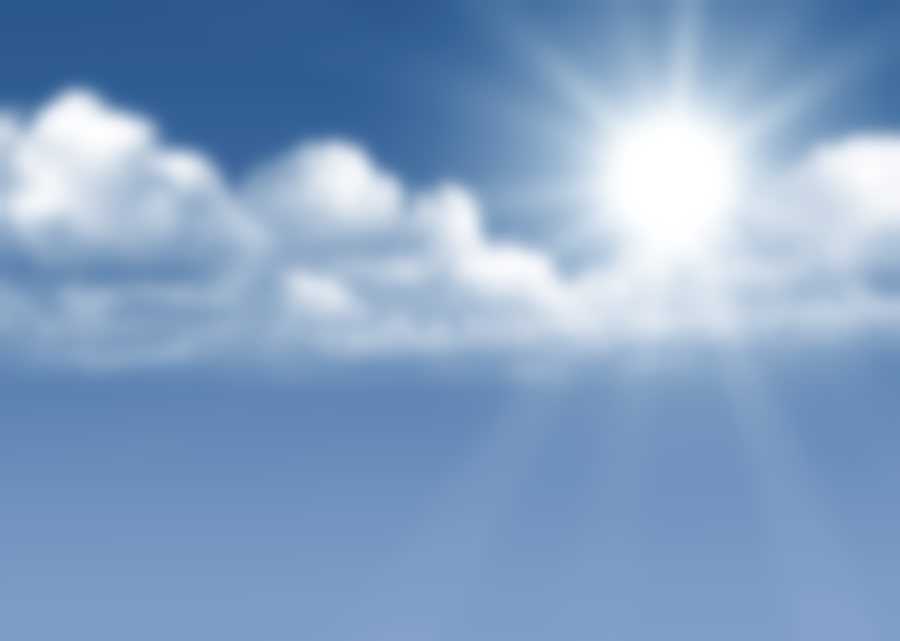

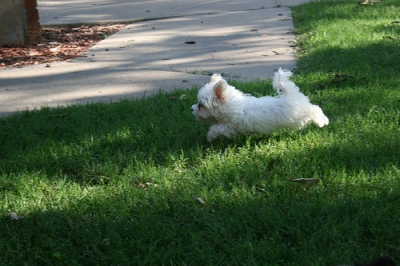

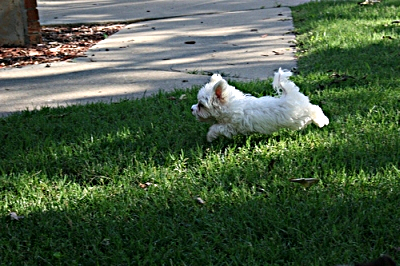

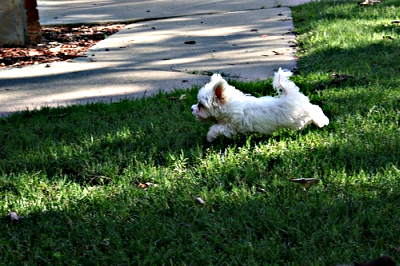

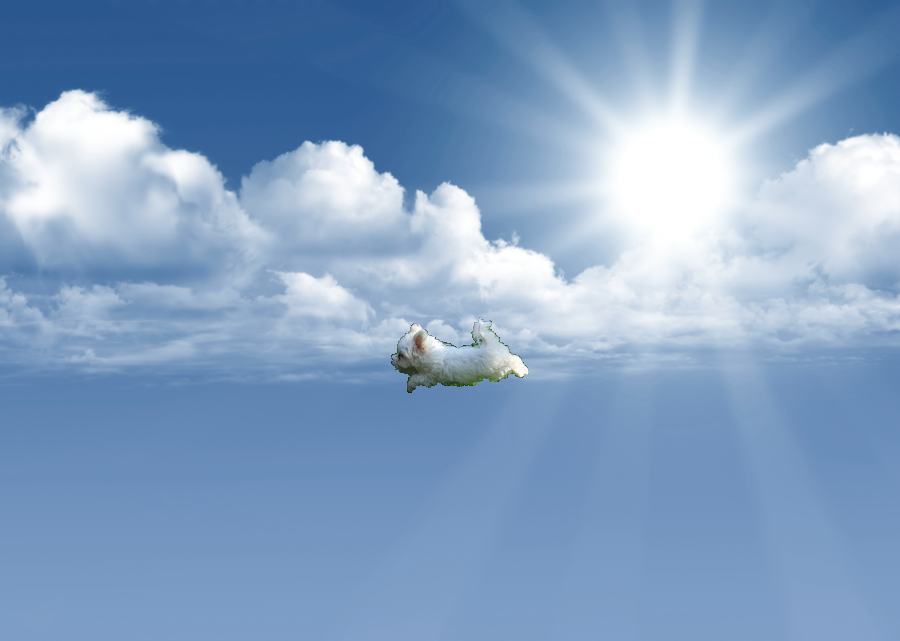

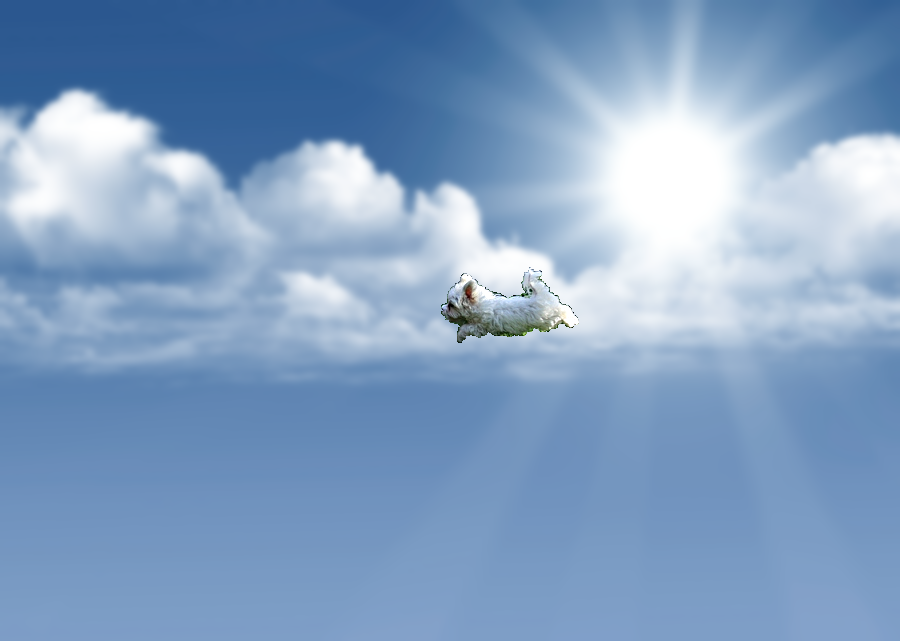

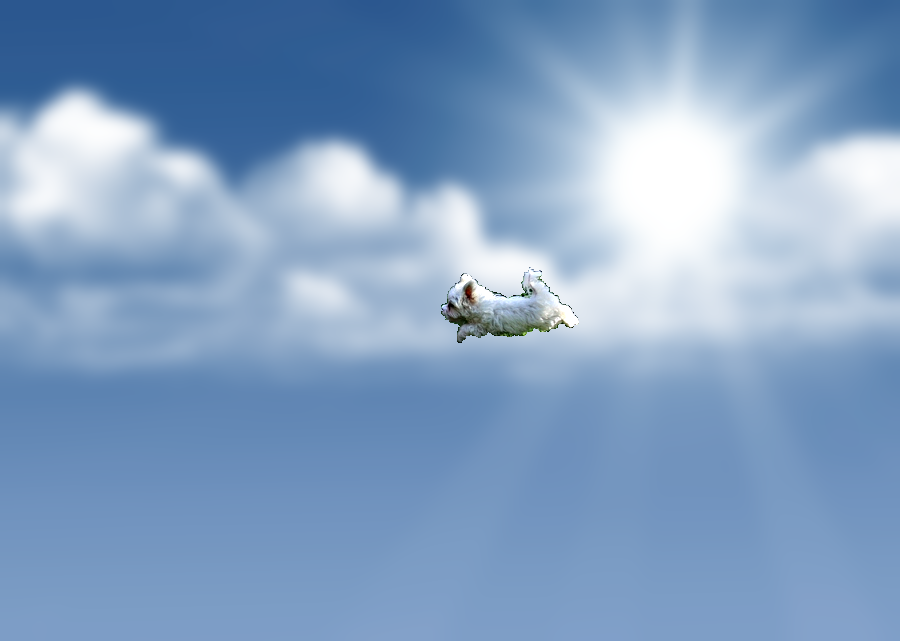

In [54]:
import cv2
import numpy as np
import urllib.request
from google.colab.patches import cv2_imshow
from scipy.ndimage import convolve

fgImg = cv2.imread('foreground.jpg')
fgMask = cv2.imread('foreground.png', cv2.IMREAD_GRAYSCALE)
bgImg = cv2.imread('back9.png')


# I tried to blur the image with a sigma value to a 2D image which takes image and sigma value as parameter. 
#If I increase the sigma value, it will make blurrier image.
def gaussianSmoothing(img, sigma):
    ksize = int(2*(np.ceil(3*sigma))+1) 
    kernel = cv2.getGaussianKernel(ksize, sigma) 
    smoothed = cv2.sepFilter2D(img, -1, kernel, kernel)
    return smoothed
#I take 4 arguments and tried to make a sharpened image.
#So, I calculated the difference between original and sharpened image
def unsharpMasking(img, sigma, amount=1.0, threshold=0):

    blurred = gaussianSmoothing(img, sigma)
    
    mask = cv2.absdiff(img, blurred)
    
    sharpened = cv2.addWeighted(img, 1 + amount, blurred, -amount, 0)
    sharpened = np.clip(sharpened, 0, 255)
  
    if threshold > 0:
        low_values_indices = mask < threshold
        sharpened[low_values_indices] = blurred[low_values_indices]
    
    return sharpened

topLeft= (250,200)
combined_img = combineForegroundBackground(fgImg, fgMask, bgImg, topLeft)
sigma_values = [3, 8]
cv2_imshow( bgImg)
for sigma in sigma_values:
    smoothed_bg = gaussianSmoothing(bgImg, sigma)
    cv2_imshow( smoothed_bg)
cv2_imshow( fgImg)
for sigma in sigma_values:
    sharpened_fg = unsharpMasking(fgImg, sigma)
    cv2_imshow(sharpened_fg)

cv2_imshow(combined_img)

#I give topLeft value as I did it in first task and start to combine images and print them. 
#My combine function takes 5 parameters for this task because of sigma of foreground images and background images. 

def combineForegroundBackgroundSmoothed(fgImg, fgMask, bgImg, sigma_bg, sigma_fg):
   
    fgH, fgW = fgImg.shape[:2]
    bgH, bgW = bgImg.shape[:2]
    bgSmoothed = gaussianSmoothing(bgImg, sigma_bg)

    fgSharpened = unsharpMasking(fgImg, sigma_fg)

    output = bgSmoothed.copy()

    for y in range(fgH):
        for x in range(fgW):
            if fgMask[y,x] > 0:
                bgX = topLeft[0] + x
                bgY = topLeft[1] + y

                if bgX >= 0 and bgX < bgW and bgY >= 0 and bgY < bgH:
                    output[bgY,bgX] = fgSharpened[y,x]

    return output
sigma_bg = 3
sigma_fg = 3
combinedImg = combineForegroundBackgroundSmoothed(fgImg, fgMask, bgImg, sigma_bg, sigma_fg)
cv2_imshow( combinedImg)   
sigma_bg = 8
sigma_fg = 5
combinedImg = combineForegroundBackgroundSmoothed(fgImg, fgMask, bgImg, sigma_bg, sigma_fg)
cv2_imshow( combinedImg)
cv2.waitKey(0)

cv2.destroyAllWindows()
